# Importing Depenencies

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import shapely as shp
from shapely.geometry import polygon, LineString, Point
import seaborn as sns
import csv
%matplotlib inline

# Analyzing Data

In [2]:
#taking a look at the paths of a few vessels
tracking = pd.read_csv("tracking.csv").drop_duplicates()
tracking.shape

(599275, 7)

In [3]:
#taking a look at the port destinations
ports = pd.read_csv("ports.csv")
ports.head(10)
ports.shape

(122, 3)

In [4]:
#importing geopandas
import geopandas as gpd
crs = {'init': 'epsg:4326'}

In [5]:
#Needed to convert to points for geopandas integration
points = ports.apply(lambda row: Point(row.long, row.lat), axis=1)
points.head()

0     POINT (-71.0575042 42.387051)
1    POINT (120.1938488 22.8123304)
2     POINT (-61.701978 10.2001663)
3          POINT (126.4833333 36.4)
4    POINT (122.0893035 29.8973026)
dtype: object

In [6]:
#creating the geopandas data frame with geo points
ports = gpd.GeoDataFrame(ports, geometry=points)
ports.crs = {"init": "epsg:4326"}
ports.head(10)

C:\Users\14029\anaconda3\envs\ports_voyage\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,port,lat,long,geometry
0,6,42.387051,-71.057504,POINT (-71.05750 42.38705)
1,7,22.812330,120.193849,POINT (120.19385 22.81233)
2,10,10.200166,-61.701978,POINT (-61.70198 10.20017)
3,11,36.400000,126.483333,POINT (126.48333 36.40000)
4,13,29.897303,122.089303,POINT (122.08930 29.89730)
5,14,35.576694,119.760085,POINT (119.76009 35.57669)
6,15,43.644183,9.989517,POINT (9.98952 43.64418)
7,16,51.698486,-5.080574,POINT (-5.08057 51.69849)
8,18,32.525267,121.420100,POINT (121.42010 32.52527)
9,19,18.407688,-69.625306,POINT (-69.62531 18.40769)


<AxesSubplot:>

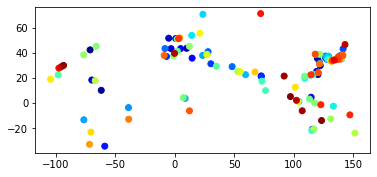

In [7]:
#plotting the ports
ports.plot(cmap ='jet', column='port')

In [8]:
#bringing down the tracking1 dataframe to convert lat and long into Points.
tracking.head(10)

,vessel,datetime,lat,long,heading,speed,draft
0,1,2019-04-21 12:49:27,-69.844458,13.256915,268.0,0.1,7.800
1,2,2019-05-27 07:15:20,-56.516713,-67.264773,118.0,16.1,9.500
2,2,2019-05-15 04:18:53,-56.507373,-66.961833,246.0,13.2,11.199
3,3,2019-09-09 02:43:29,-56.438527,-67.176253,258.0,17.8,11.400
4,2,2019-05-27 08:50:12,-56.383307,-66.600653,66.0,10.8,9.500
5,2,2019-05-15 02:50:06,-56.346600,-66.450113,242.0,12.9,11.200
6,2,2019-05-27 05:37:45,-56.335280,-67.981747,118.0,16.1,9.500
7,2,2019-05-15 06:52:44,-56.328873,-68.018593,293.0,15.0,11.200
8,4,2019-07-15 11:56:30,-56.301673,-67.386987,279.0,14.6,10.400
9,2,2019-05-15 07:13:39,-56.292287,-68.160147,293.0,14.9,11.199


In [9]:
#convert to points for geopandas 
points2 = tracking.apply(lambda row: Point(row.long, row.lat), axis=1)
points2.head()

0            POINT (13.256915 -69.8444583)
1    POINT (-67.26477300000001 -56.516713)
2            POINT (-66.961833 -56.507373)
3            POINT (-67.176253 -56.438527)
4    POINT (-66.60065299999999 -56.383307)
dtype: object

In [10]:
#creating the geopandas data frame with geo points
tracking = gpd.GeoDataFrame(tracking, geometry=points2)
tracking.crs = {"init": "epsg:4326"}
tracking.head(10)

C:\Users\14029\anaconda3\envs\ports_voyage\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,vessel,datetime,lat,long,heading,speed,draft,geometry
0,1,2019-04-21 12:49:27,-69.844458,13.256915,268.0,0.1,7.800,POINT (13.25691 -69.84446)
1,2,2019-05-27 07:15:20,-56.516713,-67.264773,118.0,16.1,9.500,POINT (-67.26477 -56.51671)
2,2,2019-05-15 04:18:53,-56.507373,-66.961833,246.0,13.2,11.199,POINT (-66.96183 -56.50737)
3,3,2019-09-09 02:43:29,-56.438527,-67.176253,258.0,17.8,11.400,POINT (-67.17625 -56.43853)
4,2,2019-05-27 08:50:12,-56.383307,-66.600653,66.0,10.8,9.500,POINT (-66.60065 -56.38331)
5,2,2019-05-15 02:50:06,-56.346600,-66.450113,242.0,12.9,11.200,POINT (-66.45011 -56.34660)
6,2,2019-05-27 05:37:45,-56.335280,-67.981747,118.0,16.1,9.500,POINT (-67.98175 -56.33528)
7,2,2019-05-15 06:52:44,-56.328873,-68.018593,293.0,15.0,11.200,POINT (-68.01859 -56.32887)
8,4,2019-07-15 11:56:30,-56.301673,-67.386987,279.0,14.6,10.400,POINT (-67.38699 -56.30167)
9,2,2019-05-15 07:13:39,-56.292287,-68.160147,293.0,14.9,11.199,POINT (-68.16015 -56.29229)


<AxesSubplot:>

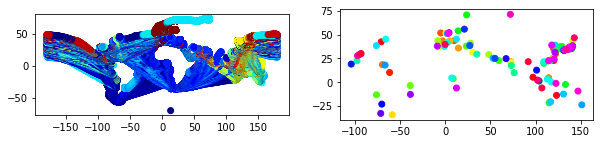

In [11]:
#plotting tracking and ports side by side
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (10,8))
tracking.plot(ax = ax1, cmap ='jet', column='vessel')
ports.plot(ax = ax2, cmap ='hsv', column='port')

C:\Users\14029\anaconda3\envs\ports_voyage\lib\site-packages\geopandas\plotting.py:641: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

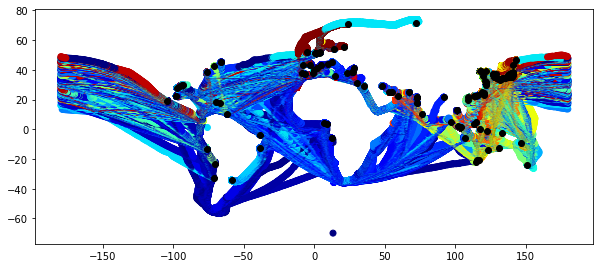

In [12]:
#ports plot on top of tracking to visualize where vessels go!
fig, ax = plt.subplots(figsize = (10,8))
tracking.plot(ax = ax, cmap ='jet', column='vessel')
ports.plot(ax = ax, color ='black', column='port')

# Cleaning Up Data for Logic

In [13]:
#viewing NaN values
tracking.isnull().values.any()

True

In [14]:
#Dropping NaN values
tracking=tracking.dropna()
tracking.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 591787 entries, 0 to 802667
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   vessel    591787 non-null  int64   
 1   datetime  591787 non-null  object  
 2   lat       591787 non-null  float64 
 3   long      591787 non-null  float64 
 4   heading   591787 non-null  float64 
 5   speed     591787 non-null  float64 
 6   draft     591787 non-null  float64 
 7   geometry  591787 non-null  geometry
dtypes: float64(5), geometry(1), int64(1), object(1)
memory usage: 40.6+ MB


In [15]:
# after analyzing geodata, changing back to pandas dataframe and dropping a few columns
tracking = pd.DataFrame(tracking).drop(["geometry", "draft", "heading"], axis=1)
tracking.head(20)

,vessel,datetime,lat,long,speed
0,1,2019-04-21 12:49:27,-69.844458,13.256915,0.1
1,2,2019-05-27 07:15:20,-56.516713,-67.264773,16.1
2,2,2019-05-15 04:18:53,-56.507373,-66.961833,13.2
3,3,2019-09-09 02:43:29,-56.438527,-67.176253,17.8
4,2,2019-05-27 08:50:12,-56.383307,-66.600653,10.8
5,2,2019-05-15 02:50:06,-56.346600,-66.450113,12.9
6,2,2019-05-27 05:37:45,-56.335280,-67.981747,16.1
7,2,2019-05-15 06:52:44,-56.328873,-68.018593,15.0
8,4,2019-07-15 11:56:30,-56.301673,-67.386987,14.6
9,2,2019-05-15 07:13:39,-56.292287,-68.160147,14.9


In [16]:
#changed the datetime to formatted timestamp 
tracking["datetime"] = pd.to_datetime(tracking["datetime"], format="%Y-%m-%d %H")
tracking.head(10)

,vessel,datetime,lat,long,speed
0,1,2019-04-21 12:49:27,-69.844458,13.256915,0.1
1,2,2019-05-27 07:15:20,-56.516713,-67.264773,16.1
2,2,2019-05-15 04:18:53,-56.507373,-66.961833,13.2
3,3,2019-09-09 02:43:29,-56.438527,-67.176253,17.8
4,2,2019-05-27 08:50:12,-56.383307,-66.600653,10.8
5,2,2019-05-15 02:50:06,-56.346600,-66.450113,12.9
6,2,2019-05-27 05:37:45,-56.335280,-67.981747,16.1
7,2,2019-05-15 06:52:44,-56.328873,-68.018593,15.0
8,4,2019-07-15 11:56:30,-56.301673,-67.386987,14.6
9,2,2019-05-15 07:13:39,-56.292287,-68.160147,14.9


In [17]:
#sorting by vessel and datetime values
tracking.sort_values(by=['vessel', 'datetime'], ignore_index=True, inplace=True)
tracking.head(10)

,vessel,datetime,lat,long,speed
0,1,2019-01-01 02:47:00,29.743,-93.8695,0.0
1,1,2019-01-01 05:47:00,29.743,-93.8695,0.0
2,1,2019-01-01 06:59:00,29.743,-93.8695,0.0
3,1,2019-01-01 08:53:00,29.743,-93.8695,0.0
4,1,2019-01-01 10:53:00,29.743,-93.8695,0.0
5,1,2019-01-01 11:56:00,29.743,-93.8695,0.0
6,1,2019-01-01 13:47:00,29.743,-93.8694,0.0
7,1,2019-01-01 14:59:00,29.743,-93.8695,0.0
8,1,2019-01-01 16:56:00,29.743,-93.8695,0.0
9,1,2019-01-01 17:54:00,29.743,-93.8695,0.0


In [18]:
# credit - https://stackoverflow.com/questions/61598857/looping-through-python-lat-lon-coords-using-haversine-formula
# vectorized haversine function
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    """
    slightly modified version: of http://stackoverflow.com/a/29546836/2901002

    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees or in radians)

    All (lat, lon) coordinates must have numeric dtypes and be of equal length.

    """
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))


tracking['dist'] = \
haversine(tracking.lat.shift(), tracking.long.shift(),
             tracking.loc[:, 'lat'], tracking.loc[:, 'long'])

In [19]:
tracking.head(20)

,vessel,datetime,lat,long,speed,dist
0,1,2019-01-01 02:47:00,29.7430,-93.8695,0.0,NaN
1,1,2019-01-01 05:47:00,29.7430,-93.8695,0.0,0.000000
2,1,2019-01-01 06:59:00,29.7430,-93.8695,0.0,0.000000
3,1,2019-01-01 08:53:00,29.7430,-93.8695,0.0,0.000000
4,1,2019-01-01 10:53:00,29.7430,-93.8695,0.0,0.000000
5,1,2019-01-01 11:56:00,29.7430,-93.8695,0.0,0.000000
6,1,2019-01-01 13:47:00,29.7430,-93.8694,0.0,0.009655
7,1,2019-01-01 14:59:00,29.7430,-93.8695,0.0,0.009655
8,1,2019-01-01 16:56:00,29.7430,-93.8695,0.0,0.000000
9,1,2019-01-01 17:54:00,29.7430,-93.8695,0.0,0.000000


In [20]:
#added a distance between points column for visualization & data
tracking['dist'] = tracking['dist'].fillna(0)
tracking.head(20)

,vessel,datetime,lat,long,speed,dist
0,1,2019-01-01 02:47:00,29.7430,-93.8695,0.0,0.000000
1,1,2019-01-01 05:47:00,29.7430,-93.8695,0.0,0.000000
2,1,2019-01-01 06:59:00,29.7430,-93.8695,0.0,0.000000
3,1,2019-01-01 08:53:00,29.7430,-93.8695,0.0,0.000000
4,1,2019-01-01 10:53:00,29.7430,-93.8695,0.0,0.000000
5,1,2019-01-01 11:56:00,29.7430,-93.8695,0.0,0.000000
6,1,2019-01-01 13:47:00,29.7430,-93.8694,0.0,0.009655
7,1,2019-01-01 14:59:00,29.7430,-93.8695,0.0,0.009655
8,1,2019-01-01 16:56:00,29.7430,-93.8695,0.0,0.000000
9,1,2019-01-01 17:54:00,29.7430,-93.8695,0.0,0.000000


In [21]:
tracking2 = tracking.drop_duplicates(subset=["lat", "long", "speed", "dist"], keep="first", ignore_index=True)
tracking2.head(10)

,vessel,datetime,lat,long,speed,dist
0,1,2019-01-01 02:47:00,29.7430,-93.8695,0.0,0.000000
1,1,2019-01-01 13:47:00,29.7430,-93.8694,0.0,0.009655
2,1,2019-01-01 14:59:00,29.7430,-93.8695,0.0,0.009655
3,1,2019-01-01 19:26:00,29.5957,-93.8002,10.6,17.694699
4,1,2019-01-01 20:48:00,29.4096,-93.6707,8.3,24.192578
5,1,2019-01-01 22:43:00,29.1219,-93.6569,11.1,32.018775
6,1,2019-01-01 23:47:00,28.9138,-93.4884,15.4,28.352958
7,1,2019-01-02 01:55:00,28.4264,-93.0596,17.2,68.464321
8,1,2019-01-02 02:15:00,28.3464,-92.9916,17.5,11.107746
9,1,2019-01-02 03:37:00,28.0195,-92.7170,18.3,45.228985


In [22]:
#double checking NaN values
tracking.isnull().values.any()

False

In [23]:
tracking2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585799 entries, 0 to 585798
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   vessel    585799 non-null  int64         
 1   datetime  585799 non-null  datetime64[ns]
 2   lat       585799 non-null  float64       
 3   long      585799 non-null  float64       
 4   speed     585799 non-null  float64       
 5   dist      585799 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 26.8 MB


In [24]:
tracking3 = tracking2.to_numpy()

In [25]:
tracking3.shape

(585799, 6)

In [26]:
ports = pd.DataFrame(ports.drop(['geometry'], axis = 1))
ports

,port,lat,long
0,6,42.387051,-71.057504
1,7,22.812330,120.193849
2,10,10.200166,-61.701978
3,11,36.400000,126.483333
4,13,29.897303,122.089303
...,...,...,...
117,173,-6.073924,106.968852
118,174,21.557508,91.816028
119,175,30.039495,-93.333524
120,177,-13.819050,123.211917


In [27]:
ports2 = ports.to_numpy()
ports2

array([[ 6.00000000e+00,  4.23870510e+01, -7.10575042e+01],
       [ 7.00000000e+00,  2.28123304e+01,  1.20193849e+02],
       [ 1.00000000e+01,  1.02001663e+01, -6.17019780e+01],
       [ 1.10000000e+01,  3.64000000e+01,  1.26483333e+02],
       [ 1.30000000e+01,  2.98973026e+01,  1.22089303e+02],
       [ 1.40000000e+01,  3.55766943e+01,  1.19760085e+02],
       [ 1.50000000e+01,  4.36441833e+01,  9.98951670e+00],
       [ 1.60000000e+01,  5.16984862e+01, -5.08057390e+00],
       [ 1.80000000e+01,  3.25252667e+01,  1.21420100e+02],
       [ 1.90000000e+01,  1.84076883e+01, -6.96253064e+01],
       [ 2.00000000e+01,  4.33649166e+01, -3.09631650e+00],
       [ 2.10000000e+01,  4.70855730e+00,  1.14441949e+02],
       [ 2.20000000e+01,  3.49791500e+01,  1.36823433e+02],
       [ 2.30000000e+01,  2.16666667e+01,  7.25333333e+01],
       [ 2.40000000e+01,  3.58266880e+01,  1.45538998e+01],
       [ 2.70000000e+01,  4.34139342e+01,  4.89735830e+00],
       [ 2.90000000e+01,  2.52088807e+01

In [28]:
tracking3[0]

array([1, Timestamp('2019-01-01 02:47:00'), 29.743, -93.8695, 0.0, 0.0],
      dtype=object)

In [29]:
speed = tracking3[:, 4]

In [30]:
distance = tracking3[:, 5]

In [31]:
speed.shape

(585799,)

In [32]:
distance.shape

(585799,)

In [33]:
near_ports = tracking3[
    (speed < .01)
    & (distance < 0.011)
][:, (0, 1, 2, 3, 4, 5)]
near_ports

array([[1, Timestamp('2019-01-01 02:47:00'), 29.743, -93.8695, 0.0, 0.0],
       [1, Timestamp('2019-01-01 13:47:00'), 29.743, -93.8694, 0.0,
        0.009654604389541787],
       [1, Timestamp('2019-01-01 14:59:00'), 29.743, -93.8695, 0.0,
        0.009654604389541787],
       ...,
       [176, Timestamp('2019-12-21 08:30:20'), 57.703648, 10.661482, 0.0,
        0.0016966332951084116],
       [176, Timestamp('2019-12-21 09:00:21'), 57.703615, 10.661602, 0.0,
        0.00801825883086996],
       [176, Timestamp('2019-12-23 18:59:41'), 51.889498, 1.674873, 0.0,
        0.0055701347360035455]], dtype=object)

In [34]:
near_ports = pd.DataFrame(near_ports)
near_ports

,0,1,2,3,4,5
0,1,2019-01-01 02:47:00,29.743,-93.8695,0.0,0.0
1,1,2019-01-01 13:47:00,29.743,-93.8694,0.0,0.009655
2,1,2019-01-01 14:59:00,29.743,-93.8695,0.0,0.009655
3,1,2019-01-17 01:59:00,51.0386,2.1882,0.0,0.006992
4,1,2019-01-17 04:14:00,51.0386,2.1882,0.0,0.0
...,...,...,...,...,...,...
38578,176,2019-12-20 18:45:20,57.703687,10.657937,0.0,0.001945
38579,176,2019-12-21 00:51:17,57.703843,10.659738,0.0,0.009796
38580,176,2019-12-21 08:30:20,57.703648,10.661482,0.0,0.001697
38581,176,2019-12-21 09:00:21,57.703615,10.661602,0.0,0.008018


In [35]:
near_ports.rename({0:"vessel", 1:"datetime", 2:"lat", 3:"long", 4:"speed", 5:"dist"}, axis=1, inplace=True)
near_ports.head(40)

,vessel,datetime,lat,long,speed,dist
0,1,2019-01-01 02:47:00,29.743,-93.8695,0.0,0.0
1,1,2019-01-01 13:47:00,29.743,-93.8694,0.0,0.009655
2,1,2019-01-01 14:59:00,29.743,-93.8695,0.0,0.009655
3,1,2019-01-17 01:59:00,51.0386,2.1882,0.0,0.006992
4,1,2019-01-17 04:14:00,51.0386,2.1882,0.0,0.0
5,1,2019-01-17 10:38:00,51.0386,2.1881,0.0,0.006992
6,1,2019-01-17 13:56:00,51.0386,2.1881,0.0,0.0
7,1,2019-02-04 07:57:00,29.4006,-93.6082,0.0,0.0
8,1,2019-02-05 07:45:00,29.3999,-93.6081,0.0,0.0
9,1,2019-02-07 01:21:00,29.4021,-93.6067,0.0,0.009687


In [36]:
near_ports.tail(40)

,vessel,datetime,lat,long,speed,dist
38543,176,2019-11-20 21:41:59,37.958835,23.404262,0.0,0.000551
38544,176,2019-11-21 00:53:57,37.958827,23.404262,0.0,0.00089
38545,176,2019-11-21 02:29:59,37.958835,23.404258,0.0,0.000956
38546,176,2019-12-02 21:48:41,51.97127,4.076625,0.0,0.0
38547,176,2019-12-03 02:28:41,51.97128,4.07662,0.0,0.000392
38548,176,2019-12-03 05:28:38,51.971272,4.07662,0.0,0.000392
38549,176,2019-12-03 08:28:41,51.971275,4.076628,0.0,0.000591
38550,176,2019-12-03 12:52:40,51.971273,4.076627,0.0,0.0
38551,176,2019-12-03 14:28:39,51.971277,4.076625,0.0,0.000465
38552,176,2019-12-03 15:55:40,51.97128,4.076622,0.0,0.000392


In [37]:
ports_num = ports2[:, 0]
ports_loc = ports2[:, (1,2)]

In [38]:
ports_num

array([  6.,   7.,  10.,  11.,  13.,  14.,  15.,  16.,  18.,  19.,  20.,
        21.,  22.,  23.,  24.,  27.,  29.,  30.,  31.,  32.,  33.,  34.,
        35.,  36.,  37.,  38.,  39.,  40.,  42.,  44.,  45.,  46.,  48.,
        51.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,  62.,  63.,
        64.,  65.,  67.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        79.,  80.,  82.,  83.,  84.,  87.,  88.,  90.,  91.,  92.,  93.,
        95.,  96.,  97.,  98.,  99., 100., 101., 102., 104., 105., 108.,
       109., 111., 112., 113., 114., 115., 117., 120., 121., 122., 123.,
       126., 130., 134., 136., 138., 139., 140., 141., 142., 143., 144.,
       146., 147., 148., 149., 150., 151., 152., 153., 154., 156., 157.,
       159., 160., 162., 165., 168., 169., 170., 173., 174., 175., 177.,
       178.])

In [39]:
vessel_loc = tracking3[:, (2, 3)]
vessel_loc.shape

(585799, 2)

In [40]:
near_ports = near_ports.assign(direction='NAN')
near_ports

,vessel,datetime,lat,long,speed,dist,direction
0,1,2019-01-01 02:47:00,29.743,-93.8695,0.0,0.0,NAN
1,1,2019-01-01 13:47:00,29.743,-93.8694,0.0,0.009655,NAN
2,1,2019-01-01 14:59:00,29.743,-93.8695,0.0,0.009655,NAN
3,1,2019-01-17 01:59:00,51.0386,2.1882,0.0,0.006992,NAN
4,1,2019-01-17 04:14:00,51.0386,2.1882,0.0,0.0,NAN
...,...,...,...,...,...,...,...
38578,176,2019-12-20 18:45:20,57.703687,10.657937,0.0,0.001945,NAN
38579,176,2019-12-21 00:51:17,57.703843,10.659738,0.0,0.009796,NAN
38580,176,2019-12-21 08:30:20,57.703648,10.661482,0.0,0.001697,NAN
38581,176,2019-12-21 09:00:21,57.703615,10.661602,0.0,0.008018,NAN


In [41]:
prev_speed = near_ports['speed'].shift(1).astype(float)
prev_dist = near_ports['dist'].shift(1).astype(float)

conditions = [
    ((near_ports['speed'] == 0.0) & (near_ports['dist'] == 0.00000)),
    #this line below doesn't seem to be working as I'd like it to.
    ((near_ports['speed'] > 0.0) & (near_ports['dist'] < 25)),
]

choices = [
    "at_port",
    "leaving_or_getting_to_port"
]

near_ports["direction"] = np.select(conditions, choices)

In [42]:
near_ports.head(40)

,vessel,datetime,lat,long,speed,dist,direction
0,1,2019-01-01 02:47:00,29.743,-93.8695,0.0,0.0,at_port
1,1,2019-01-01 13:47:00,29.743,-93.8694,0.0,0.009655,0
2,1,2019-01-01 14:59:00,29.743,-93.8695,0.0,0.009655,0
3,1,2019-01-17 01:59:00,51.0386,2.1882,0.0,0.006992,0
4,1,2019-01-17 04:14:00,51.0386,2.1882,0.0,0.0,at_port
5,1,2019-01-17 10:38:00,51.0386,2.1881,0.0,0.006992,0
6,1,2019-01-17 13:56:00,51.0386,2.1881,0.0,0.0,at_port
7,1,2019-02-04 07:57:00,29.4006,-93.6082,0.0,0.0,at_port
8,1,2019-02-05 07:45:00,29.3999,-93.6081,0.0,0.0,at_port
9,1,2019-02-07 01:21:00,29.4021,-93.6067,0.0,0.009687,0


In [43]:
near_ports.tail(40)

,vessel,datetime,lat,long,speed,dist,direction
38543,176,2019-11-20 21:41:59,37.958835,23.404262,0.0,0.000551,0
38544,176,2019-11-21 00:53:57,37.958827,23.404262,0.0,0.00089,0
38545,176,2019-11-21 02:29:59,37.958835,23.404258,0.0,0.000956,0
38546,176,2019-12-02 21:48:41,51.97127,4.076625,0.0,0.0,at_port
38547,176,2019-12-03 02:28:41,51.97128,4.07662,0.0,0.000392,0
38548,176,2019-12-03 05:28:38,51.971272,4.07662,0.0,0.000392,0
38549,176,2019-12-03 08:28:41,51.971275,4.076628,0.0,0.000591,0
38550,176,2019-12-03 12:52:40,51.971273,4.076627,0.0,0.0,at_port
38551,176,2019-12-03 14:28:39,51.971277,4.076625,0.0,0.000465,0
38552,176,2019-12-03 15:55:40,51.97128,4.076622,0.0,0.000392,0


In [44]:
at_ports = tracking3[
    (speed == .00)
    & (distance == 0.00000)
][:, (0, 1, 2, 3, 4, 5)]
at_ports

array([[1, Timestamp('2019-01-01 02:47:00'), 29.743, -93.8695, 0.0, 0.0],
       [1, Timestamp('2019-01-17 04:14:00'), 51.0386, 2.1882, 0.0, 0.0],
       [1, Timestamp('2019-01-17 13:56:00'), 51.0386, 2.1881, 0.0, 0.0],
       ...,
       [176, Timestamp('2019-06-26 10:35:11'), 43.364357, -3.09502, 0.0,
        0.0],
       [176, Timestamp('2019-12-02 21:48:41'), 51.97127, 4.076625, 0.0,
        0.0],
       [176, Timestamp('2019-12-03 12:52:40'), 51.971273, 4.076627, 0.0,
        0.0]], dtype=object)

In [45]:
at_ports = pd.DataFrame(at_ports)
at_ports

,0,1,2,3,4,5
0,1,2019-01-01 02:47:00,29.743,-93.8695,0.0,0.0
1,1,2019-01-17 04:14:00,51.0386,2.1882,0.0,0.0
2,1,2019-01-17 13:56:00,51.0386,2.1881,0.0,0.0
3,1,2019-02-04 07:57:00,29.4006,-93.6082,0.0,0.0
4,1,2019-02-05 07:45:00,29.3999,-93.6081,0.0,0.0
...,...,...,...,...,...,...
1161,176,2019-03-27 21:55:00,55.6637,21.1386,0.0,0.0
1162,176,2019-06-20 04:30:36,70.684582,23.600302,0.0,0.0
1163,176,2019-06-26 10:35:11,43.364357,-3.09502,0.0,0.0
1164,176,2019-12-02 21:48:41,51.97127,4.076625,0.0,0.0


In [46]:
at_ports.rename({0:"vessel", 1:"datetime", 2:"lat", 3:"long", 4:"speed", 5:"dist"}, axis=1, inplace=True)
at_ports

,vessel,datetime,lat,long,speed,dist
0,1,2019-01-01 02:47:00,29.743,-93.8695,0.0,0.0
1,1,2019-01-17 04:14:00,51.0386,2.1882,0.0,0.0
2,1,2019-01-17 13:56:00,51.0386,2.1881,0.0,0.0
3,1,2019-02-04 07:57:00,29.4006,-93.6082,0.0,0.0
4,1,2019-02-05 07:45:00,29.3999,-93.6081,0.0,0.0
...,...,...,...,...,...,...
1161,176,2019-03-27 21:55:00,55.6637,21.1386,0.0,0.0
1162,176,2019-06-20 04:30:36,70.684582,23.600302,0.0,0.0
1163,176,2019-06-26 10:35:11,43.364357,-3.09502,0.0,0.0
1164,176,2019-12-02 21:48:41,51.97127,4.076625,0.0,0.0


In [47]:
#this is the dataframe that will be the end result 
voyages = pd.DataFrame(columns=['vessel', 'begin_date', 'end_date', 'begin_port_id', 'end_port_id'])

In [48]:
prev_direction = nearest_ports_2['at_port'].shift(1).astype(bool)
prev_distance= nearest_ports_2['dist'].shift(1).astype(float)

conditions = [
    ((nearest_ports_2['direction']) == 'at_port')
]

choices = [
    ''
]

voyages['begin_'] = np.select(conditions, choices)

NameError: name 'nearest_ports_2' is not defined